In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("/Users/bibhusundarmohapatra/Downloads/extended_energy_data.csv")

In [6]:
data

,_id,postOfficeId,roomType,duration,efficiency,timestamp,energyKWh
0,id_1,postOffice_3,large,1.482069,moderate,2024-07-14,1.482069
1,id_2,postOffice_9,large,4.081697,low,2024-07-11,6.122546
2,id_3,postOffice_12,medium,3.056617,moderate,2024-12-03,3.056617
3,id_4,postOffice_5,large,1.354971,high,2024-02-13,1.083977
4,id_5,postOffice_5,medium,1.422448,moderate,2024-01-14,1.422448
...,...,...,...,...,...,...,...
95,id_96,postOffice_10,large,2.790513,moderate,2024-10-27,2.790513
96,id_97,postOffice_5,small,6.051824,high,2024-02-20,4.841459
97,id_98,postOffice_8,medium,4.449908,high,2024-05-28,3.559926
98,id_99,postOffice_4,small,0.604183,high,2024-03-15,0.483347


In [12]:
# Ensure 'timestamp' is datetime and sort by it
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp')

# Check for missing values and handle them
data['energyKWh'] = data['energyKWh'].fillna(data['energyKWh'].mean())

# Prophet requires columns named 'ds' (datetime) and 'y' (target)
prophet_data = data[['timestamp', 'energyKWh']].rename(columns={'timestamp': 'ds', 'energyKWh': 'y'})

In [13]:
train_size = int(0.8 * len(prophet_data))
train = prophet_data[:train_size]
test = prophet_data[train_size:]


In [32]:
model = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model.fit(train)

14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = model.make_future_dataframe(periods=len(test), freq='D') 
forecast = model.predict(future)

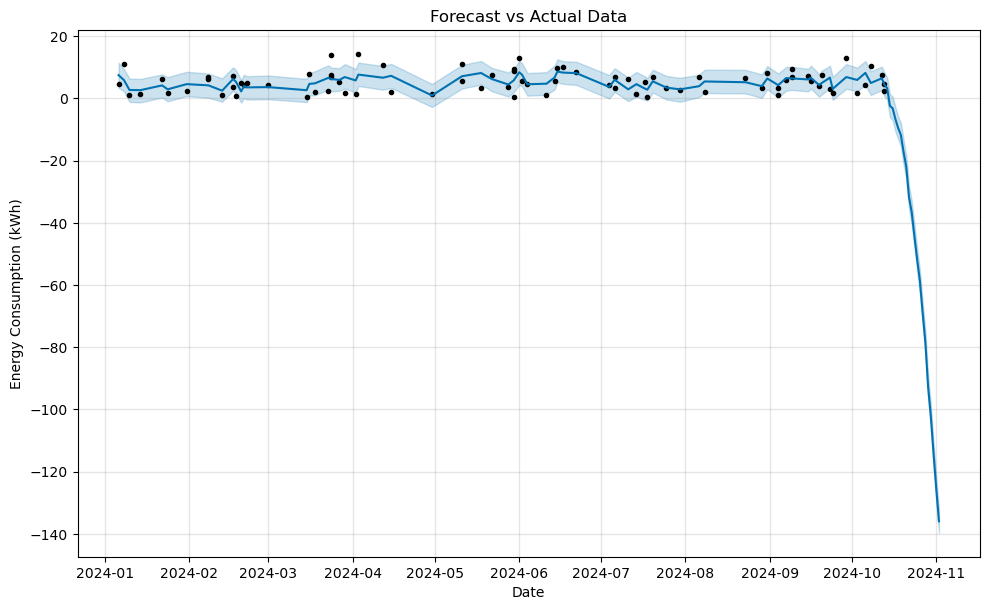

In [34]:
fig = model.plot(forecast)
plt.title("Forecast vs Actual Data")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.show()